In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel

In [2]:
# Load your dataset
data = pd.read_csv('/content/bank-full.csv', sep=";")

In [3]:
# Exploring the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.shape

(45211, 17)

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# 1) Binning
age_bins = [18, 35, 60, 100]
age_labels = ['Young', 'Adult', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Create a cross-tabulation between age groups and subscription status
age_subscription_crosstab = pd.crosstab(data['age_group'], data['y'])
print(age_subscription_crosstab)

y             no   yes
age_group             
Young      14713  2182
Adult      24518  2598
Senior       686   502


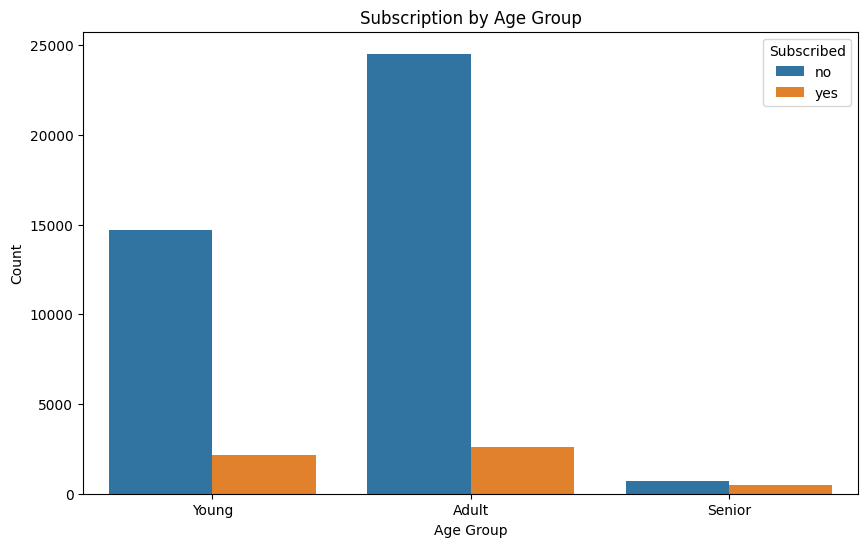

In [8]:
# 2) Visualize using bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='y')
plt.title('Subscription by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()


In [9]:
# 3) One Hot Encoding For Categorical Columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
data_encoded = data.copy()
for col in categorical_columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

In [10]:
# 4) Covariance matrix
cov_matrix = data_encoded.cov()
cov_matrix

<ipython-input-10-ad50b76491e9>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = data_encoded.cov()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,112.758107,-0.759945,-2.604386,-0.848344,-0.025260,3.161477e+03,-0.978809,-0.060980,0.250021,-0.805979,-1.352458,-12.711716,0.156601,-25.260550,0.031512,0.077372
job,-0.759945,10.710283,0.123503,0.408088,-0.002984,1.816675e+02,-0.203854,-0.039620,-0.241158,0.622508,-0.913891,3.997941,0.069335,-8.013600,-0.006865,0.035639
marital,-2.604386,0.123503,0.369943,0.049397,-0.000568,3.929617e+00,-0.004864,-0.010462,-0.021410,-0.026633,-0.012785,1.856478,-0.016948,1.167615,0.020978,-0.010137
education,-0.848344,0.408088,0.049397,0.559500,-0.001067,1.469293e+02,-0.033743,-0.013328,-0.074506,0.141132,-0.128886,0.372760,0.014495,0.003921,0.030272,-0.014324
default,-0.025260,-0.002984,-0.000568,-0.001067,0.017702,-2.703861e+01,-0.000398,0.003769,0.001840,0.010435,0.004595,-0.343373,0.006934,-0.399386,-0.005617,0.004592
balance,3161.476700,181.667461,3.929617,146.929259,-27.038614,9.270599e+06,-104.037974,-94.209197,-74.565605,114.095467,181.067262,16905.750545,-137.513232,1047.321715,116.939527,-63.142152
housing,-0.978809,-0.203854,-0.004864,-0.033743,-0.000398,-1.040380e+02,0.246888,0.007532,0.083935,-0.115711,0.405610,0.649454,-0.036326,6.178093,0.042435,-0.049130
loan,-0.060980,-0.039620,-0.010462,-0.013328,0.003769,-9.420920e+01,0.007532,0.134557,-0.003581,0.034711,0.024426,-1.172514,0.011341,-0.835724,-0.009331,0.005608
contact,0.250021,-0.241158,-0.021410,-0.074506,0.001840,-7.456560e+01,0.083935,-0.003581,0.806316,-0.208772,0.975112,-4.819034,0.054565,-22.011620,-0.305730,0.241760
day,-0.805979,0.622508,-0.026633,0.141132,0.010435,1.140955e+02,-0.115711,0.034711,-0.208772,69.263609,-0.150842,-64.740317,4.189519,-77.535404,-0.991307,0.686992


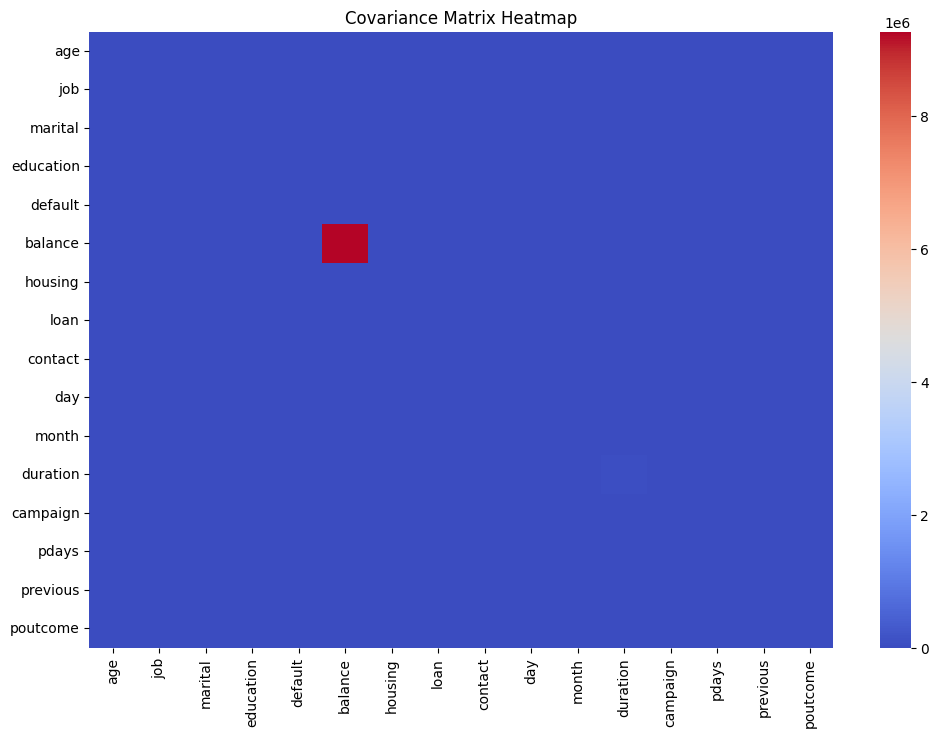

In [11]:
# Covariance matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, cmap='coolwarm', annot=False)
plt.title('Covariance Matrix Heatmap')
plt.show()

Covariance matrix is inefficient.

In [12]:
# 4) Correlation matrix
cor_matrix = data_encoded.corr()
cor_matrix

<ipython-input-12-6411430e9cec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data_encoded.corr()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460


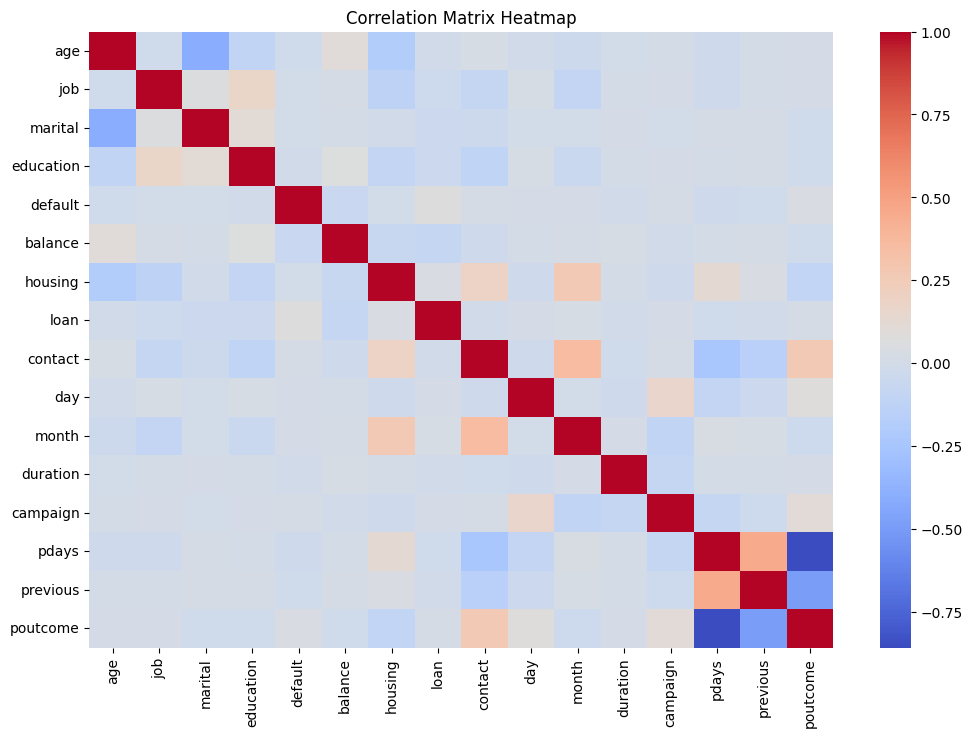

In [13]:
# 4) Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation matrix is better here as:
1)Normalization: Correlation is a standardized measure that ranges from -1 to 1, making it easier to interpret.

2)Strength and Direction.

3)Comparison: Correlation allows for easier comparison between different pairs of variables.

In [14]:
# 5) T Test(With hypothesized mean)
from scipy.stats import ttest_1samp

hypothesized_mean_age = 40

t_stat, p_value = ttest_1samp(data_encoded['age'], hypothesized_mean_age)
print(t_stat)
print(p_value)

# Print results and interpret
if p_value < 0.05:
    print("Reject null hypothesis: The average age is significantly different from the hypothesized mean.")
else:
    print("Fail to reject null hypothesis: The average age is not significantly different from the hypothesized mean.")


18.746558134130538
4.0901888078722927e-78
Reject null hypothesis: The average age is significantly different from the hypothesized mean.


In [15]:
# 5) T Test(Without hypothesized mean)
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(data_encoded['age'], 0)  # Hypothesized mean of 0

alpha = 0.05  # significance level

print("T-Statistic for 'age':", t_stat)
print("P-Value for 'age':", p_value)

if p_value < alpha:
    print("Reject null hypothesis: The average age is significantly different from 0.")
else:
    print("Fail to reject null hypothesis: The average age is not significantly different from 0.")


T-Statistic for 'age': 819.7016362659874
P-Value for 'age': 0.0
Reject null hypothesis: The average age is significantly different from 0.


The hypothesized mean in a one-sample t-test serves as a reference value against which you compare the sample mean to determine if they are significantly different. In the absence of a hypothesized mean, you would still be able to perform a one-sample t-test, but the interpretation would focus on whether the sample mean is significantly different from zero.

In [16]:
# Added
# Calculate the Pearson correlation coefficient between age and balance
correlation_coefficient = data_encoded['age'].corr(data_encoded['balance'])

print("Pearson's Correlation Coefficient between 'age' and 'balance':", correlation_coefficient)

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    print("Positive correlation: As age increases, balance tends to increase.")
elif correlation_coefficient < 0:
    print("Negative correlation: As age increases, balance tends to decrease.")
else:
    print("No linear correlation between age and balance.")


Pearson's Correlation Coefficient between 'age' and 'balance': 0.09778273937134754
Positive correlation: As age increases, balance tends to increase.


A t-test is typically used to compare means between two groups or variables, and it's not the appropriate statistical test for assessing the relationship between two continuous variables like 'age' and 'balance'.